In [1]:
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('scikit-allel version: %s' %allel.__version__)
print('pandas version: %s' %pd.__version__)
print('numpy version: %s' %np.__version__)

scikit-allel version: 1.3.5
pandas version: 2.0.1
numpy version: 1.23.5


In [2]:
import malariagen_data
print('malariagen_data version %s' %malariagen_data.__version__)
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")
ag3

malariagen_data version 7.5.0


<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230223
Species analysis        : aim_20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.5.0
Client location         : unknown
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

------------------------------------------

In [3]:
df_samples = ag3.sample_metadata(sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
df_samples.head()

Load sample metadata:   0%|          | 0/13 [00:00<?, ?it/s]

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3


In [4]:
meta_fw = pd.read_excel('../Data/Meta/meta_new_3_0.xlsx', sheet_name="meta3.0")
meta_fw.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,longitude,latitude,sex_call,...,pca_pops,pca_country,aim_species_fraction_colu_no2l,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,-4.235,11.150,F,...,An.gam,BFgam,0.016488,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,-4.235,11.150,F,...,An.gam,BFgam,0.026316,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,An.col,BFcol,0.981007,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,An.col,BFcol,0.987593,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,An.col,BFcol,0.973597,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3


In [5]:
#excluding samples from location <5 and arabiensis
mysel = np.array(df_samples['sample_id'].isin(meta_fw['sample_id']))
mysel

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
def ld_prune(gn, pos, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
        pos_pruned = pos.compress(loc_unlinked, axis=0)
    return gn, pos_pruned

-----------------------------------
## Chromosome X

In [8]:
gt = ag3.snp_genotypes(region=["X"], site_mask="gamb_colu", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt).subset(sel1 = mysel)
gt

<GenotypeDaskArray shape=(16362809, 1190, 2) dtype=int8>

In [9]:
pos = ag3.snp_sites(region=["X"], field='POS', site_mask="gamb_colu")
ref = ag3.snp_sites(region=["X"], field='REF', site_mask="gamb_colu")
alt = ag3.snp_sites(region=["X"], field='ALT', site_mask="gamb_colu")

---------------------------
### Biallelic and MAF selection

In [10]:
ac = gt.count_alleles(max_allele=1).compute()
biallel = ac.is_biallelic()

In [11]:
gt_biallelic = gt.compress(biallel, axis=0)
ac_biallel = ac[biallel]

In [12]:
pos_biallelic = pos[biallel]
ref_biallelic = ref[biallel]
alt_biallelic = alt[:,0][biallel]

In [13]:
maf_min = 0.01

In [14]:
freqs = ac_biallel.to_frequencies()
maf_ok = np.min(np.array(freqs), axis=1) >= maf_min
gt_biallelic_maf = gt_biallelic.compress(maf_ok, axis=0)
pos_biallelic_maf = np.compress(maf_ok, pos, axis=0)

----------------------
### Downsampling

In [15]:
downsample_n = 100000

In [16]:
if pos.size > downsample_n:
        print("Downsampling... to {0} from {1}".format(downsample_n, pos_biallelic_maf.size))
        idx = np.random.choice(np.arange(0, pos_biallelic_maf.size), downsample_n, False)
        idx.sort()
        pos_downsampled = np.take(pos_biallelic_maf, idx)
        ref_downsampled = np.take(ref_biallelic, idx)
        alt_downsampled = np.take(alt_biallelic, idx)
        g_downsampled = gt_biallelic_maf.take(idx, axis=0)

Downsampling... to 100000 from 403401


In [17]:
g_X = g_downsampled.compute()
pos_X = pos_downsampled.compute()
ref_X = ref_downsampled
alt_X = alt_downsampled

In [41]:
gn_X = g_X.to_n_alt()
gnu_X, pos_X_prun = ld_prune(gn_X, pos_X, size=500, step=200,  threshold=.5, n_iter=5)

iteration 1 retaining 91242 removing 8758 variants
iteration 2 retaining 91141 removing 101 variants
iteration 3 retaining 91125 removing 16 variants
iteration 4 retaining 91125 removing 0 variants
iteration 5 retaining 91125 removing 0 variants


-----------------------------------
## PCA

In [42]:
coords, model = allel.pca(gnu_X, n_components=10, scaler='patterson')

In [43]:
#new df for samples location
df_samples_fw = df_samples[mysel].merge(meta_fw, how = 'inner', on='sample_id')

In [44]:
df_samples_fw.pca_pops.unique()

array(['An.gam', 'An.col', 'gcx1-GM', 'gcx2', 'gcx1-GW'], dtype=object)

In [45]:
populations = df_samples_fw.pca_pops.unique()

In [46]:
pop_colours = {
'An.gam': '#1838DE',
'An.col': '#FF0000',
'gcx2': '#FFA500',
'gcx1-GW': '#98FB98',
'gcx1-GM': '#008000',
}


In [47]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='.', linestyle='', mec=pop_colours[pop], mfc='none', mew=2, label=pop, markersize=6)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = df_samples_fw.pca_pops.values
    fig, ax = plt.subplots()
    y = model.explained_variance_
    x = np.arange(1, len(y)+1)
    ax.plot(x, y, 'ko')
    ax.set_xticks(x)
    ax.set_xlabel('principal component')
    ax.set_ylabel('variance explained')
    ax.grid(axis='x')
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(2, 3, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(2, 3, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax = fig.add_subplot(2, 3, 3)
    plot_pca_coords(coords, model, 4, 5, ax, sample_population)
    ax = fig.add_subplot(2, 3, 4)
    plot_pca_coords(coords, model, 6, 7, ax, sample_population)
    ax = fig.add_subplot(2, 3, 5)
    plot_pca_coords(coords, model, 8, 9, ax, sample_population)

    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    fig.savefig('final_pca_X.png', dpi=300)

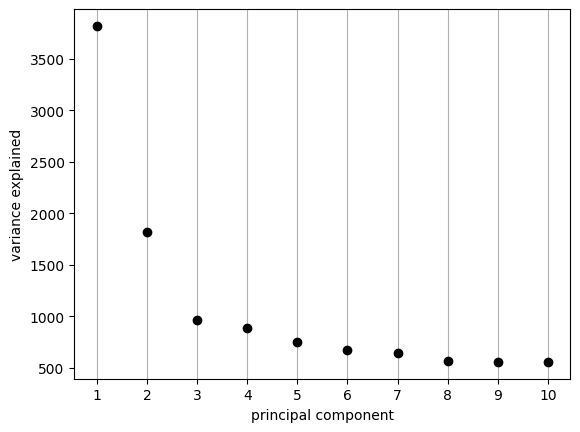

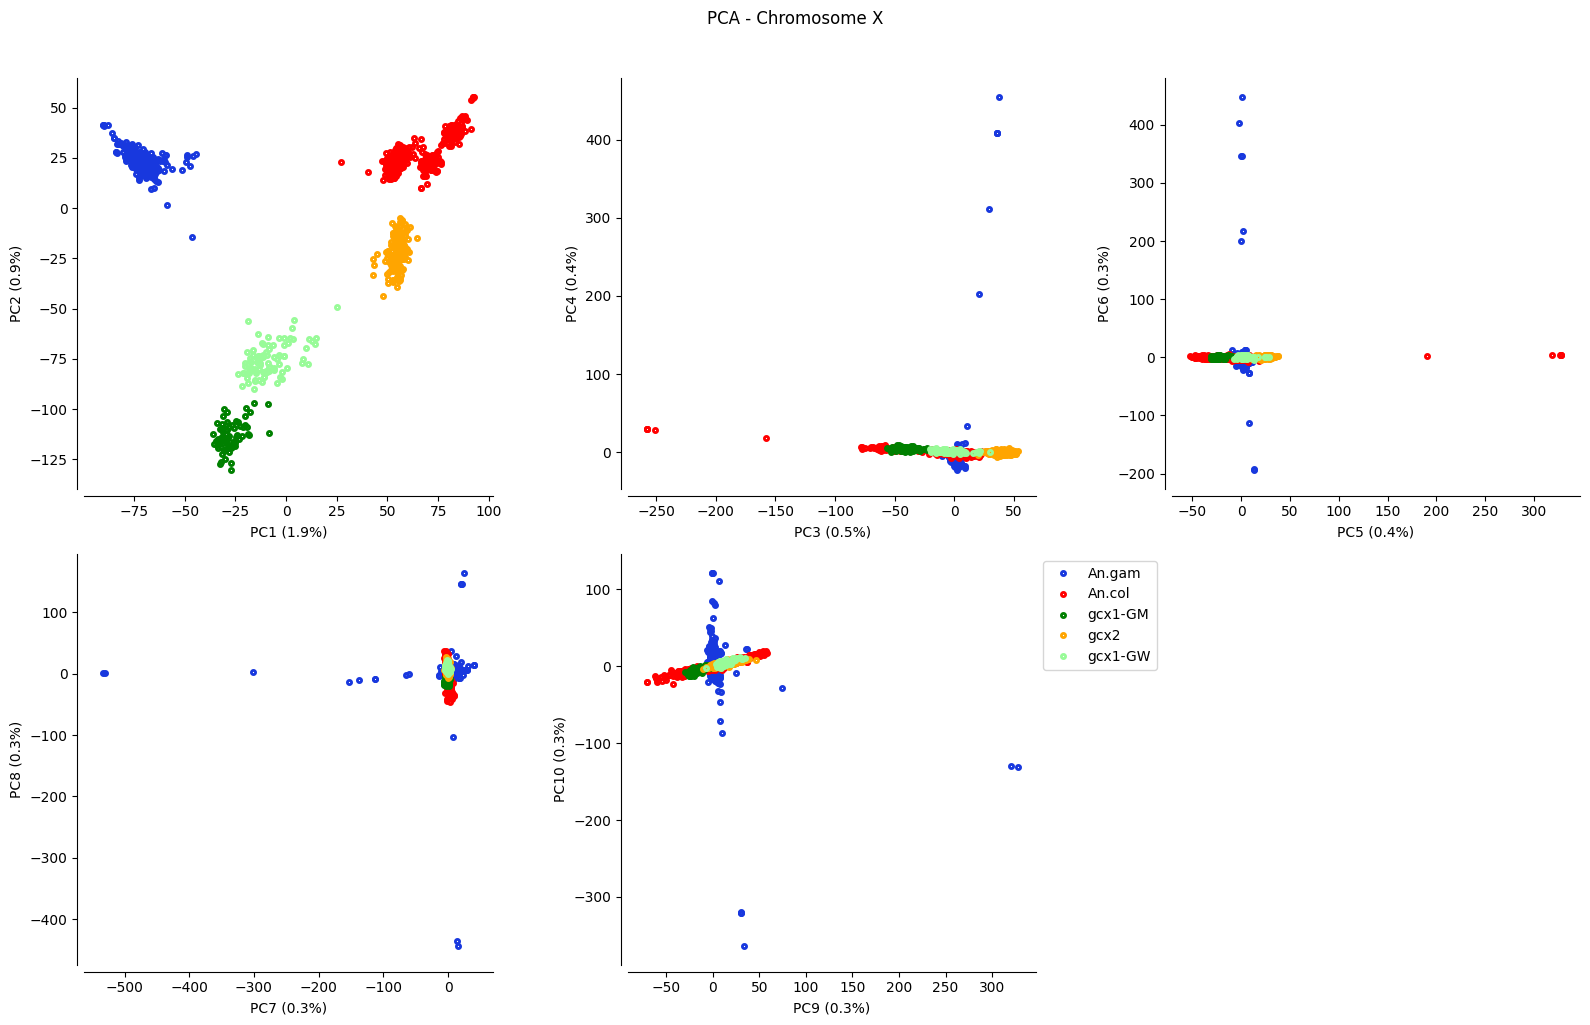

In [48]:
fig_pca(coords, model, 'PCA - Chromosome X')

In [ ]:
## Save PCA data
data = meta_fw.copy()
for i in range(2):
    data[f'PC{i+1}'] = coords[:, i]
    # save results
    evr = model.explained_variance_ratio_
    data.to_csv('chrX_pca_final.csv', index=False)
    np.save('chrX_pca_final.npy', evr)

------------------------
## Save geno

In [26]:
import h5py
from allel import chunked

g_tot = g_X.subset(sel0=np.in1d(pos_X,pos_X_prun))
h5f = h5py.File('chrom_X_west_final.h5', mode='w')
h5g = h5f.create_group('X')
chunked.copy(g_tot, storage='hdf5', group=h5g, name='calldata')
h5f.close()

-------------------------------------
#  Ped files generation for ADMIXTURE ####

## New Method

In [66]:
### save pos file
import csv
with open("pos_X_prun.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(list(pos_X_prun))

In [130]:
ds_snps_X = ag3.snp_calls(
    region="X",
    sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"],
    site_mask="gamb_colu",
)
ds_snps_asc_X = (
    ds_snps_X
    [["variant_contig", "variant_position", "variant_allele", "sample_id", "call_genotype"]]
    .isel(alleles=slice(0, 2))
    .sel(variants=ds_snps_X.variants.isin(pos_X_prun))
    .sel(samples=mysel)
)
gt = ds_snps_asc_X["call_genotype"].data
ds_snps_asc_X["call_gn_ref"] = ("variants", "samples"), gnu_X
val = ds_snps_asc_X["call_gn_ref"].values.T
val_X = np.where(val==-1, np.nan, val)
alleles_X = ds_snps_asc_X["variant_allele"].values
properties_X = {
    "iid": ds_snps_asc_X["sample_id"].values,
    "chromosome": ds_snps_asc_X["variant_contig"].values,
    "bp_position": ds_snps_asc_X["variant_position"].values,
    "allele_1": alleles_X[:, 0],
    "allele_2": alleles_X[:, 1],
}

In [136]:
val_full = np.hstack((val_3R,val_3L))

In [137]:
import bed_reader

In [138]:
bed_reader.to_bed(
    filepath="chrom_X_full_pruned.bed",
    val=val_X,
    properties=properties_X,
    count_A1=True,
)

## Old Method

### Chrom X

In [ ]:
refalt = np.column_stack([ref_X, alt_X])
refalt, refalt.shape

In [ ]:
df_alleles = pd.DataFrame(refalt.astype('<U16'), columns=['ref', 'alt'])

In [ ]:
df_alleles['0'] = df_alleles['ref'] + " " + df_alleles['ref']
df_alleles['1'] = df_alleles['ref'] + " " + df_alleles['alt']
df_alleles['2'] = df_alleles['alt'] + " " + df_alleles['alt']

In [ ]:
g_d = g_X.to_n_alt(fill=-1).compute()
g_reshaped = np.transpose(g_d, (1,0))
g_reshaped_df = pd.DataFrame((g_reshaped).astype(str))

In [ ]:
df_alleles_T = df_alleles.T
dict_alleles = df_alleles_T.to_dict()
df_ped = (g_reshaped_df.astype(str).replace(dict_alleles))
df_ped['Family ID'] = meta_fw['sample_id'].loc[:]
df_ped['Individual ID'] = meta_fw['sample_id'].loc[:]
df_ped = df_ped.set_index('Individual ID').reset_index()
df_ped = df_ped.set_index('Family ID').reset_index()
df_ped['phenotype'] = df_ped[df_ped.columns[2:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df_ped['Paternal ID'] = 0
df_ped['Maternal ID'] = 0
df_ped['Sex'] = 2
df_ped['Not used'] = 0
df_ped = df_ped[['Family ID', 'Individual ID', 'Paternal ID', 'Maternal ID', 'Sex', 'Not used', 'phenotype']]
df_ped.head()

In [ ]:
df_ped.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_X.ped', sep=" ", header=None, index=False)

In [ ]:
df_map_n = pd.DataFrame()
df_map_n['3'] = pos_X
df_map_n['1'] = 'X'+":"+df_map_n['3'].astype("str")
df_map_n['2'] = '0'
df_map_n['0'] = 'X'
df_map_n = df_map_n[['0','1','2','3']]
df_map_n.head()

In [ ]:
df_map_n.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_X.map', sep="\t", header=None, index=False)

In [ ]:
df_nosex_n = pd.DataFrame()
df_nosex_n['0'] = meta_fw['sample_id']
df_nosex_n.to_csv('/home/randomx/Ag1000G/Data/Extras/chrom_X.nosex', sep=" ", header=None, index=False)